# **Sales Prediction Using Machine Learning**

This notebook builds a regression model to predict product sales based on advertising budgets across TV, Radio, and Newspaper channels.  
The workflow includes data loading, exploratory data analysis (EDA), baseline modeling, model comparison, and final model development using Random Forest.

**Dataset Summary:**
- Records: 200  
- Features: TV, Radio, Newspaper  
- Target: Sales  
- No missing values or duplicates  

The objective is to understand which advertising channels drive sales and to create an accurate prediction model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [3]:
import os
os.getcwd()


'C:\\Users\\aadit'

In [5]:
df = pd.read_csv("Advertising.csv")
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


            count      mean        std  min     25%     50%      75%    max
Unnamed: 0  200.0  100.5000  57.879185  1.0  50.750  100.50  150.250  200.0
TV          200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio       200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper   200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales       200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0


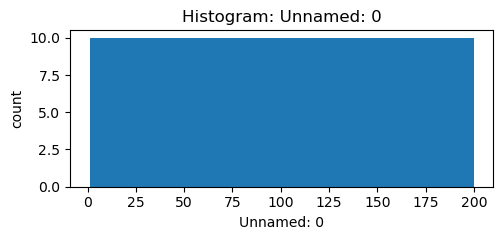

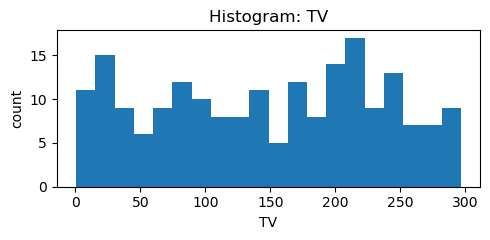

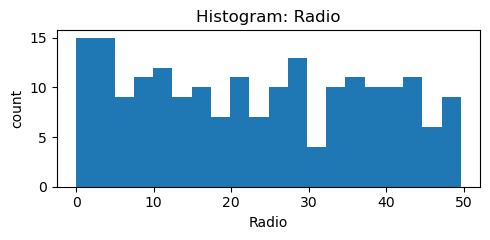

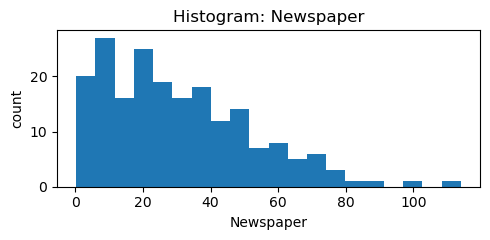

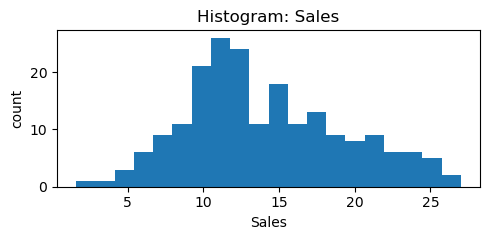

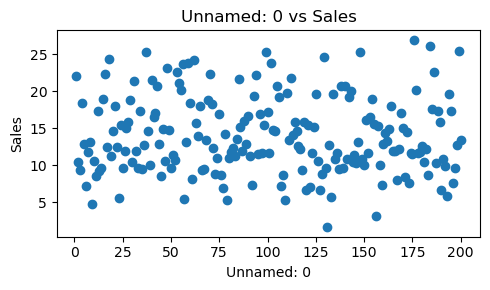

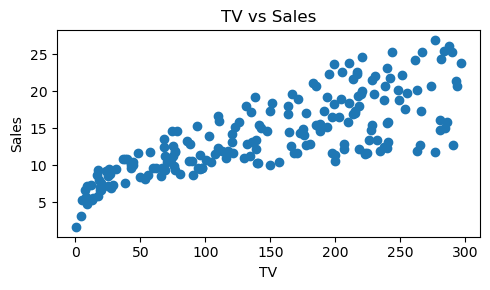

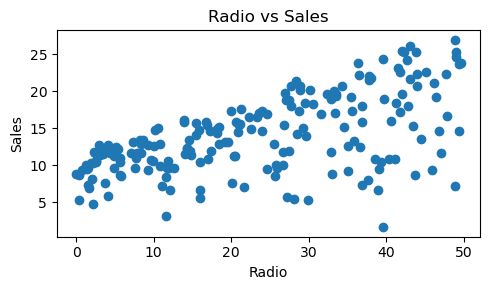

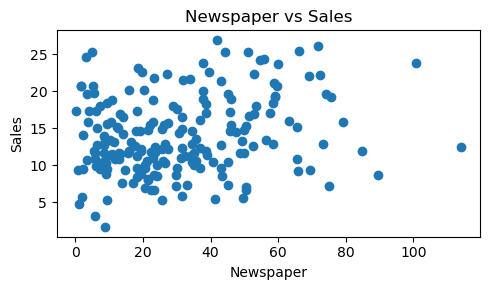

Correlation with Sales:

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


In [6]:
print(df.describe().transpose())

# Histograms
for col in df.columns:
    plt.figure(figsize=(5,2.5))
    plt.hist(df[col], bins=20)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

# Scatter plots: feature vs Sales
target = "Sales"
features = [c for c in df.columns if c != target]

for f in features:
    plt.figure(figsize=(5,3))
    plt.scatter(df[f], df[target])
    plt.title(f"{f} vs {target}")
    plt.xlabel(f)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

# Correlation table
print("Correlation with Sales:\n")
print(df.corr()[target].sort_values(ascending=False))


In [7]:
print("Duplicates:", df.duplicated().sum())

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} potential outliers")


Duplicates: 0
Unnamed: 0: 0 potential outliers
TV: 0 potential outliers
Radio: 0 potential outliers
Newspaper: 2 potential outliers
Sales: 0 potential outliers


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def print_metrics(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)      # mean squared error
    rmse = np.sqrt(mse)                           # root mean squared error
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MAE: {mae:.4f}  RMSE: {rmse:.4f}  R2: {r2:.4f}")

# Re-run the predictions (if you still have model_lr, pred_train, pred_test in memory)
print_metrics(y_train, pred_train, "Train")
print_metrics(y_test, pred_test, "Test")

# Show coefficients (again)
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model_lr.coef_})
print("\nModel Coefficients:")
print(coef_df)


Train MAE: 1.1976  RMSE: 1.6443  R2: 0.8958
Test MAE: 1.4651  RMSE: 1.7886  R2: 0.8986

Model Coefficients:
      Feature  Coefficient
0  Unnamed: 0     0.000644
1          TV     0.044718
2       Radio     0.189251
3   Newspaper     0.003046


In [10]:
# Remove unwanted column
df_clean = df.drop(columns=["Unnamed: 0"])

# Train-test split again
X = df_clean.drop("Sales", axis=1)
y = df_clean["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-train linear model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_train = model_lr.predict(X_train)
pred_test = model_lr.predict(X_test)

# Print metrics again
print_metrics(y_train, pred_train, "Train")
print_metrics(y_test, pred_test, "Test")

# Show coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model_lr.coef_})
print("\nModel Coefficients:")
print(coef_df)


Train MAE: 1.1985  RMSE: 1.6447  R2: 0.8957
Test MAE: 1.4608  RMSE: 1.7816  R2: 0.8994

Model Coefficients:
     Feature  Coefficient
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761


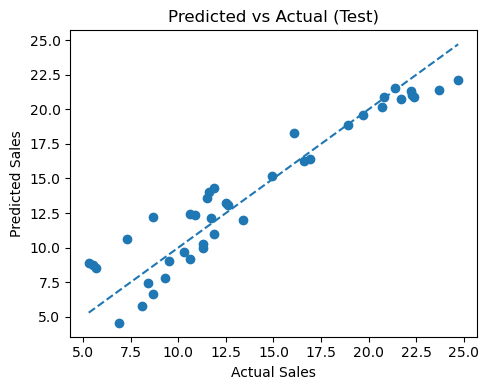

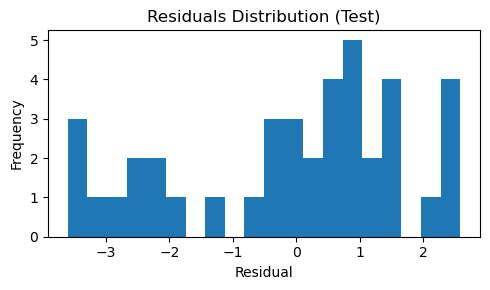

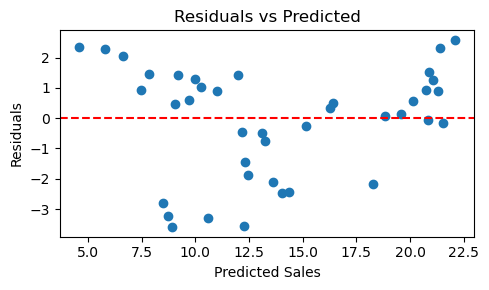

In [11]:
# Predicted vs Actual
plt.figure(figsize=(5,4))
plt.scatter(y_test, pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual (Test)")
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test - pred_test

plt.figure(figsize=(5,3))
plt.hist(residuals, bins=20)
plt.title("Residuals Distribution (Test)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(5,3))
plt.scatter(pred_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring="r2", cv=kf)
    print(f"{name}: Mean R² = {scores.mean():.4f}, Std = {scores.std():.4f}")


Linear Regression: Mean R² = 0.8827, Std = 0.0395
Ridge Regression: Mean R² = 0.8827, Std = 0.0395
Lasso Regression: Mean R² = 0.8829, Std = 0.0393
Random Forest: Mean R² = 0.9808, Std = 0.0047


Final Train MAE: 0.2109  RMSE: 0.2941  R2: 0.9967
Final Test MAE: 0.6131  RMSE: 0.7403  R2: 0.9826

Feature Importance:
     Feature  Importance
0         TV    0.625447
1      Radio    0.361745
2  Newspaper    0.012808


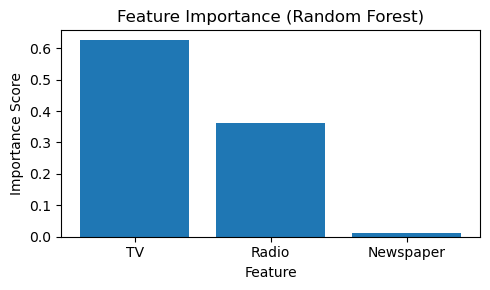

In [13]:
# Train the final best model
final_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None
)

final_model.fit(X_train, y_train)

# Predictions
final_pred_train = final_model.predict(X_train)
final_pred_test = final_model.predict(X_test)

print_metrics(y_train, final_pred_train, "Final Train")
print_metrics(y_test, final_pred_test, "Final Test")

# Feature Importance
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": final_model.feature_importances_
})

print("\nFeature Importance:")
print(importances.sort_values("Importance", ascending=False))

# Bar plot of feature importance
plt.figure(figsize=(5,3))
plt.bar(importances["Feature"], importances["Importance"])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
# **Final Summary**

**Best Model:** Random Forest Regressor  
**Performance:**
- Train R²: 0.9967  
- Test R²: 0.9826  
- Very low MAE and RMSE, indicating strong predictive accuracy.

**Key Insights:**
- TV advertising has the greatest impact on sales.
- Radio has a moderate influence.
- Newspaper has minimal effect.

The Random Forest model captures nonlinear relationships effectively and provides highly reliable sales predictions.  
This completes the end-to-end workflow for Task 2: Sales Prediction.
